In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
# import seaborn as sns
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression

In [19]:
pd.__version__

'0.25.1'

# Read Data
* Data Descriptions: https://www.kaggle.com/c/titanic/data

In [170]:
# 본인의 환경에 맞게 경로 설정 해주세요.
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [171]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.525,NaN,S


In [172]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


## Check null values

In [173]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# EDA

In [175]:
# 어떤 feature가 Survived 컬럼을 유의미하게 설명하는지 분석해보세요.

In [176]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


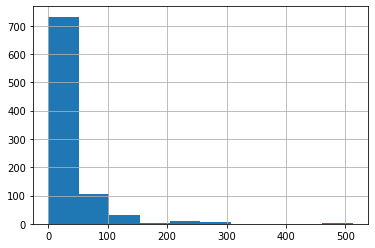

In [177]:
train['Fare'].hist()

# Concat Data

In [178]:
train_except_Survived = train.drop('Survived', axis=1)

In [179]:
train_except_Survived['tag'] = 'train'
test['tag'] = 'test'

In [180]:
df = pd.concat([train_except_Survived, test])

# Feature Engineering

In [181]:
# 작업 예시
# fill data which contains null value in columns we want to use
# but fill null data as zero is not the best choice. find a better way.
# null이 있다면 0으로 채워줍니다. 최선의 방법은 아닙니다. 더 좋은 방법을 찾아보세요!
# df = df.fillna(0)

In [182]:
# 작업
# 미싱데이터 채워넣기
# train : Age 177, Cabin 687, Embarked 2
# test : Age 86, Cabin 327, Fare 1

In [183]:
test.isnull().sum(), 

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 tag              0
 dtype: int64,)

In [184]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
tag              0
dtype: int64

### 결측치 채워넣기

1. Cabin은 일단 0으로 채워넣기
2. Fare는 일단 0으로 채워넣기
3. Embarked는 갯수 가장 많은 것으로 채워넣기
4. Age 여성 평균, 남성 평균 값으로 채워넣기(advanced: Age Pclass, 여성, 남성 평균 값으로 채워넣기)

In [185]:
# 1. Cabin은 일단 0으로 채워넣기

In [186]:
df['Cabin'].fillna(0, inplace=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,0,S,test
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,test
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,0,S,test


In [111]:
# 2. Fare는 일단 0으로 채워넣기

In [38]:
# df[df['Fare'].isnull()] = df[df['Fare'].isnull()].replace({'Fare': {np.nan: 0}})

In [39]:
# df[df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag


In [ ]:
# 2_1. Fare는 전체 값의 median으로 채워넣기

In [115]:
# df['Fare'] = df['Fare'].fillna(df['Fare'].dropna().median())

In [187]:
# df[df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,0,S,test


In [ ]:
# 2_2. 3등석에 탄 60대 이상 노인의 Fare의 median 값으로 채워넣기

In [194]:
df['Fare'] = df['Fare'].fillna(df[(df['Age'] > 60) & (df['Pclass'] == 3)]['Fare'].median())

In [195]:
df[df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag


In [196]:
# 3. Embarked는 갯수 가장 많은 것으로 채워넣기

In [197]:
from collections import Counter

In [198]:
Counter(df['Embarked'])

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})

In [199]:
df[df['Embarked'].isnull()] = df[df['Embarked'].isnull()].replace({'Embarked': {np.nan: 'S'}})

In [200]:
df[df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag


In [201]:
# 4. Age 여성 평균, 남성 평균 값으로 채워넣기

In [202]:
f_age = df[df['Sex'] == 'female']['Age']

In [203]:
round(f_age.mean(), 2)

28.69

In [204]:
f_age.median()

27.0

In [205]:
m_age = df[df['Sex'] == 'male']['Age']

In [206]:
m_age.mean()

30.58522796352584

In [207]:
m_age.median()

28.0

In [208]:
# df[(df['Sex'] == 'female') & (df['Age'].isnull())] = df[(df['Sex'] == 'female') & (df['Age'].isnull())].replace({'Age': {np.nan: round(f_age.mean(), 2)}})

In [209]:
# df[(df['Sex'] == 'male') & (df['Age'].isnull())] = df[(df['Sex'] == 'male') & (df['Age'].isnull())].replace({'Age': {np.nan: round(m_age.mean(), 2)}})

In [210]:
# 4_advanced. Age Pclass, 여성, 남성 평균 값으로 채워넣기

In [211]:
sex_pclass_age_mean = df.groupby(['Sex', 'Pclass'])['Age'].mean().round(2)
sex_pclass_age_mean = pd.DataFrame(sex_pclass_age_mean)
sex_pclass_age_mean

Age
Sex    Pclass       
female 1       37.04
       2       27.50
       3       22.19
male   1       41.03
       2       30.82
       3       25.96

In [212]:
sex_pclass_age_mean.loc[('female', 1)][0]

37.04

In [213]:
def get_mean_age(x):
    print(x)
    x['Age'] = sex_pclass_age_mean.loc[(x['Sex'], x['Pclass'])][0]
    print(x)
    print()
    return x

In [214]:
df[df['Age'].isnull()] = df[df['Age'].isnull()].apply(lambda x: get_mean_age(x), axis=1)
    
# axis=1을 해야 row by row로 x가 뽑혀짐

PassengerId                   6
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                         0
Embarked                      Q
tag                       train
Name: 5, dtype: object
PassengerId                   6
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                       25.96
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                         0
Embarked                      Q
tag                       train
Name: 5, dtype: object

PassengerId                   6
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                    

Name: 415, dtype: object

PassengerId                       421
Pclass                              3
Name           Gheorgheff, Mr. Stanio
Sex                              male
Age                               NaN
SibSp                               0
Parch                               0
Ticket                         349254
Fare                           7.8958
Cabin                               0
Embarked                            C
tag                             train
Name: 420, dtype: object
PassengerId                       421
Pclass                              3
Name           Gheorgheff, Mr. Stanio
Sex                              male
Age                             25.96
SibSp                               0
Parch                               0
Ticket                         349254
Fare                           7.8958
Cabin                               0
Embarked                            C
tag                             train
Name: 420, dtype: object

PassengerId

Name: 740, dtype: object

PassengerId                   761
Pclass                          3
Name           Garfirth, Mr. John
Sex                          male
Age                           NaN
SibSp                           0
Parch                           0
Ticket                     358585
Fare                         14.5
Cabin                           0
Embarked                        S
tag                         train
Name: 760, dtype: object
PassengerId                   761
Pclass                          3
Name           Garfirth, Mr. John
Sex                          male
Age                         25.96
SibSp                           0
Parch                           0
Ticket                     358585
Fare                         14.5
Cabin                           0
Embarked                        S
tag                         train
Name: 760, dtype: object

PassengerId                          767
Pclass                                 1
Name           Brewe, Dr.

PassengerId                   1204
Pclass                           3
Name           Sadowitz, Mr. Harry
Sex                           male
Age                            NaN
SibSp                            0
Parch                            0
Ticket                     LP 1588
Fare                         7.575
Cabin                            0
Embarked                         S
tag                           test
Name: 312, dtype: object
PassengerId                   1204
Pclass                           3
Name           Sadowitz, Mr. Harry
Sex                           male
Age                          25.96
SibSp                            0
Parch                            0
Ticket                     LP 1588
Fare                         7.575
Cabin                            0
Embarked                         S
tag                           test
Name: 312, dtype: object

PassengerId                   1224
Pclass                           3
Name           Thomas, Mr. Tannous
Sex 

In [215]:
df[df['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag


In [216]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,0,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,0,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,0,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.96,0,0,A.5. 3236,8.0500,0,S,test
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.9000,C105,C,test
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.2500,0,S,test
416,1308,3,"Ware, Mr. Frederick",male,25.96,0,0,359309,8.0500,0,S,test


결측치 체크

In [217]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
tag            0
dtype: int64

### Feature 변환

1. Sex 컬럼 명목형으로 변환
2. Pclass 명목형, 더미코딩
3. Embarked 컬럼 더미 코딩

In [218]:
# Sex 컬럼 명목형으로 변환

In [219]:
df = df.replace({'Sex': {'female': 1, 'male': 0}})

In [220]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
0,1,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,0,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,0,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,0,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,25.96,0,0,A.5. 3236,8.0500,0,S,test
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00,0,0,PC 17758,108.9000,C105,C,test
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50,0,0,SOTON/O.Q. 3101262,7.2500,0,S,test
416,1308,3,"Ware, Mr. Frederick",0,25.96,0,0,359309,8.0500,0,S,test


In [221]:
# Pclass 명목형, 더미코딩

In [222]:
# Embarked 컬럼 더미 코딩

In [223]:
df['Pclass_save'] = df['Pclass']

In [224]:
df['Embarked_save'] = df['Embarked']

In [225]:
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [226]:
df.drop(['Pclass_3', 'Embarked_S'], axis=1, inplace=True)

In [227]:
df

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,tag,Pclass_save,Embarked_save,Pclass_1,Pclass_2,Embarked_C,Embarked_Q
0,1,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,0,train,3,S,0,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C85,train,1,C,1,0,1,0
2,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,0,train,3,S,0,0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C123,train,1,S,1,0,0,0
4,5,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,0,train,3,S,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",0,25.96,0,0,A.5. 3236,8.0500,0,test,3,S,0,0,0,0
414,1306,"Oliva y Ocana, Dona. Fermina",1,39.00,0,0,PC 17758,108.9000,C105,test,1,C,1,0,1,0
415,1307,"Saether, Mr. Simon Sivertsen",0,38.50,0,0,SOTON/O.Q. 3101262,7.2500,0,test,3,S,0,0,0,0
416,1308,"Ware, Mr. Frederick",0,25.96,0,0,359309,8.0500,0,test,3,S,0,0,0,0


# Make dataset for model fitting

In [228]:
# choose independent variables(Xs) which are useful!
# 트레이닝에 사용할 변수 목록을 적어주세요.
# independents = ['Pclass_save']
independents = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_Q']
dependent = ['Survived']

In [229]:
# 적어준 변수 목록을 사용해 데이터를 트레이닝에 맞는 포맷으로 변경합니다.
train_X = df[df['tag'] == 'train'][independents]
train_y = train[dependent]

test_X = df[df['tag'] == 'test'][independents]

# Model fitting

independents = ['Pclass']일때,

R제곱 : 0.11456941170524182

In [230]:
# 학습 fit()
reg = LinearRegression().fit(train_X, train_y)

In [231]:
# x 계수
# x 계수의 의미를 해석하세요.
reg.coef_

array([[ 4.97875400e-01, -6.25784556e-03, -4.30734130e-02,
        -1.61723957e-02,  3.11625058e-04,  3.59915948e-01,
         1.99087445e-01,  6.41569890e-02,  5.17059703e-02]])

In [232]:
# 절편
reg.intercept_

array([0.26545688])

In [233]:
reg.score(train_X, train_y, sample_weight=None)

0.4007219763543757

# Prediction

In [234]:
# 학습 fit()
reg = LinearRegression().fit(train_X, train_y)
reg.score(train_X, train_y, sample_weight=None)

0.4007219763543757

In [235]:
# 학습 fit()
reg = LinearRegression().fit(train_X, train_y)
reg.score(train_X, train_y, sample_weight=None)

0.4007219763543757

In [236]:
prediction = reg.predict(test_X)

In [237]:
# 회귀 예측 결과를 classification으로 바꿔주기
# 여기에서는 회귀 예측 결과가 0.5 이상일 때에는 1, 그렇지 않으면 0으로 바꿔줬습니다.
prediction_binomial = [1 if p>=0.5 else 0 for p in prediction]

In [238]:
prediction_df = pd.DataFrame({'prediction': [p[0] for p in prediction],
                   'prediction_binomial': prediction_binomial})

In [239]:
prediction_df['prediction_binomial']

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: prediction_binomial, Length: 418, dtype: int64

## Statsmodels 사용

In [240]:
from statsmodels.formula.api import ols

In [241]:
train_set = df[df['tag'] == 'train']
train_set['Survived'] =  train['Survived']

/home/leebom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [242]:
test_set = df[df['tag'] == 'test']

In [243]:
# res = ols('Survived ~ Sex + Age + SibSp:Parch + Fare + Pclass_1 + Pclass_2 + Embarked_C + Embarked_Q', data=train_set).fit()
res = ols('Survived ~ Sex*Age + SibSp:Parch + Pclass_save + Embarked_save', data=train_set).fit()

In [244]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     87.46
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           1.37e-96
Time:                        10:52:22   Log-Likelihood:                -387.31
No. Observations:                 891   AIC:                             790.6
Df Residuals:                     883   BIC:                             829.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.9605      0.069     13.876      0.000       0.825       1.096
Embarked_save[T.Q]    -0.0113      0.054     -0.209      0.835      -0.118       0.095
Embarked_save[T.S]    -0.0644      0.034     -1.917      0.056      -0.130       0.002
Sex                    0.2971      0.063      4.697      0.000       0.173       0.421
Age                   -0.0086      0.001     -6.719      0.000      -0.011      -0.006
Sex:Age                0.0070      0.002      3.471      0.001       0.003       0.011
SibSp:Parch           -0.0270      0.007     -4.091      0.000      -0.040      -0.014
Pclass_save           -0.1881      0.018    -10.644      0.000      -0.223      -0.153
==============================================================================
Omnibus:                       43.282   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.488
Skew:                           0.567   Prob(JB):                     2.96e-11
Kurtosis:                       3.143   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
prob = res.predict(test_set)

In [246]:
prob

0      0.088963
1      0.552706
2      0.041324
3      0.100235
4      0.566162
         ...   
413    0.109151
414    1.006272
415    0.001643
416    0.109151
417    0.146503
Length: 418, dtype: float64

In [247]:
# 회귀 예측 결과를 classification으로 바꿔주기
# 여기에서는 회귀 예측 결과가 0.5 이상일 때에는 1, 그렇지 않으면 0으로 바꿔줬습니다.
prob_binomial = [1 if p>=0.5 else 0 for p in prob]

In [248]:
prob_binomial

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


# Submission

In [249]:
submission = pd.read_csv('./Data/gender_submission.csv')

In [95]:
submission['Survived'] = prediction_df['prediction_binomial']

In [96]:
submission.to_csv('./submission_sklearn_linear_regression.csv', index=False)

# Rules
* 주어진 시간을 준수해주세요. Kaggle 제출과 채점까지 마친 상태여야 합니다.
* 모방은 창조의 어머니! 먼저 데이터를 분석해본 분석가들의 노트북을 보고 따라하세요.
* 새롭게 배우게 된 지식을 동료와 공유하세요.

# Hint
1. Logistic Regression으로도 풀어보세요. (이외에 다른 모델 사용 가능)
2. null 값이 있는 컬럼을 사용한다면, 현명하게 채워보세요.
3. Sex 컬럼을 regression에 넣을 수 있는 형태로 변형하세요.
4. 기존 데이터를 사용해 새로운 의미있는 변수를 만들어보세요. (캐글에 다른 노트북들을 참고하세요.)
    ### 참고해볼만한 노트북:
    * https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
    * https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# 로지스틱 회귀?
* https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/
* https://ratsgo.github.io/machine%20learning/2017/07/02/logistic/